In [1]:
import time
import xarray as xr
import numpy as np

from xcube.core.rectify import rectify_dataset
from xcube.core.sentinel3 import open_sentinel3_product
from xcube.util.perf import measure_time

Define a fake-logger. The normal logger output does not appear in notebooks.

In [2]:
class Logger:
    info = print
logger = Logger()

## Rectify an OCLI L1b Product

---
Open a Sentinel-3 OLCI L1b product:

In [3]:
src_ds = open_sentinel3_product('C:\\Users\\Norman\\Downloads\\S3B_OL_1_EFR____20190728T103451_20190728T103751_20190729T141105_0179_028_108_1800_LN1_O_NT_002.SEN3')

In [4]:
src_ds

<xarray.Dataset>
Dimensions:         (columns: 4865, rows: 4091)
Dimensions without coordinates: columns, rows
Data variables:
    longitude       (rows, columns) float64 dask.array<chunksize=(819, 973), meta=np.ndarray>
    latitude        (rows, columns) float64 dask.array<chunksize=(819, 973), meta=np.ndarray>
    Oa10_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa11_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa03_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa17_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa06_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa02_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa07_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa01_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa13_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa21_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa09_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa19_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa08_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa16_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa14_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa12_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    quality_flags   (rows, columns) uint32 dask.array<chunksize=(819, 973), meta=np.ndarray>
    detector_index  (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa05_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa15_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa20_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa04_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>
    Oa18_radiance   (rows, columns) float32 dask.array<chunksize=(1023, 1217), meta=np.ndarray>

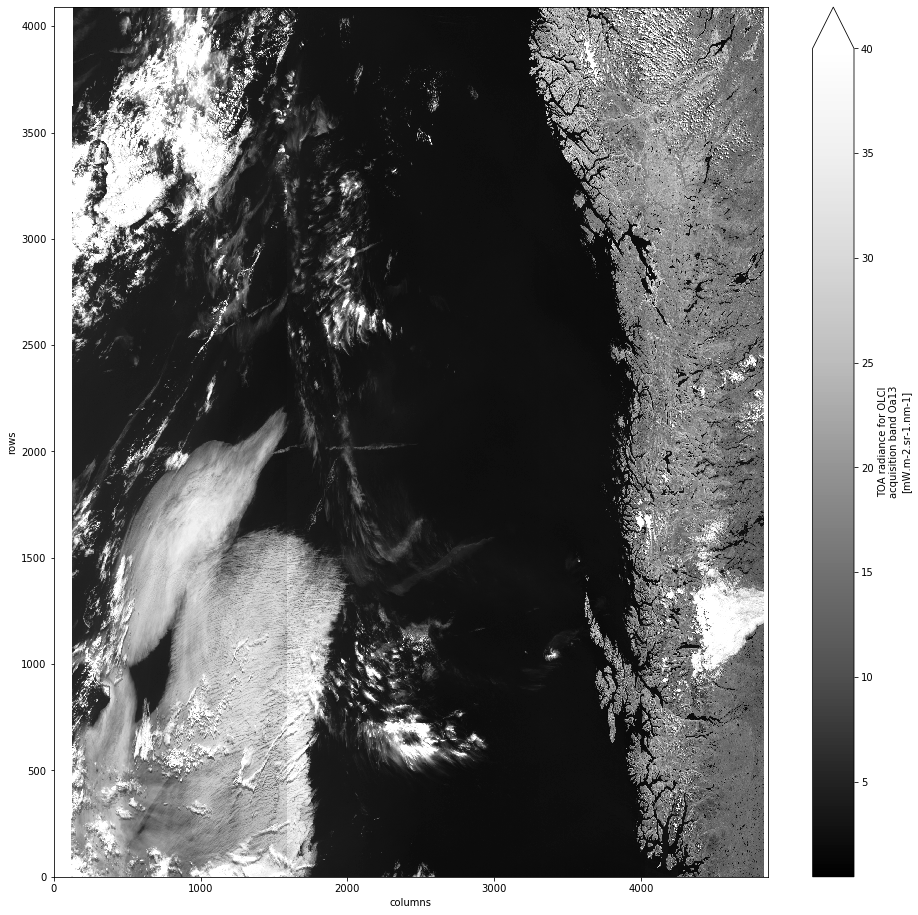

In [5]:
src_ds.Oa13_radiance.plot.imshow(figsize=(16,16), vmax=40, cmap='Greys_r')

Preload x,y coordinates so we are faster:

In [6]:
src_ds.longitude.load()
src_ds.latitude.load()

<xarray.DataArray 'latitude' (rows: 4091, columns: 4865)>
array([[73.353817, 73.353724, 73.353631, ..., 69.392316, 69.390915,
        69.389513],
       [73.351265, 73.351172, 73.351079, ..., 69.390159, 69.388758,
        69.387356],
       [73.348713, 73.34862 , 73.348527, ..., 69.388002, 69.3866  ,
        69.385199],
       ...,
       [62.921048, 62.920886, 62.920725, ..., 59.966632, 59.96562 ,
        59.964609],
       [62.918494, 62.918333, 62.918172, ..., 59.964223, 59.963211,
        59.9622  ],
       [62.91594 , 62.915779, 62.915618, ..., 59.961814, 59.960802,
        59.959791]])
Dimensions without coordinates: rows, columns
Attributes:
    long_name:      DEM corrected latitude
    standard_name:  latitude
    units:          degrees_north
    valid_max:      90000000
    valid_min:      -90000000

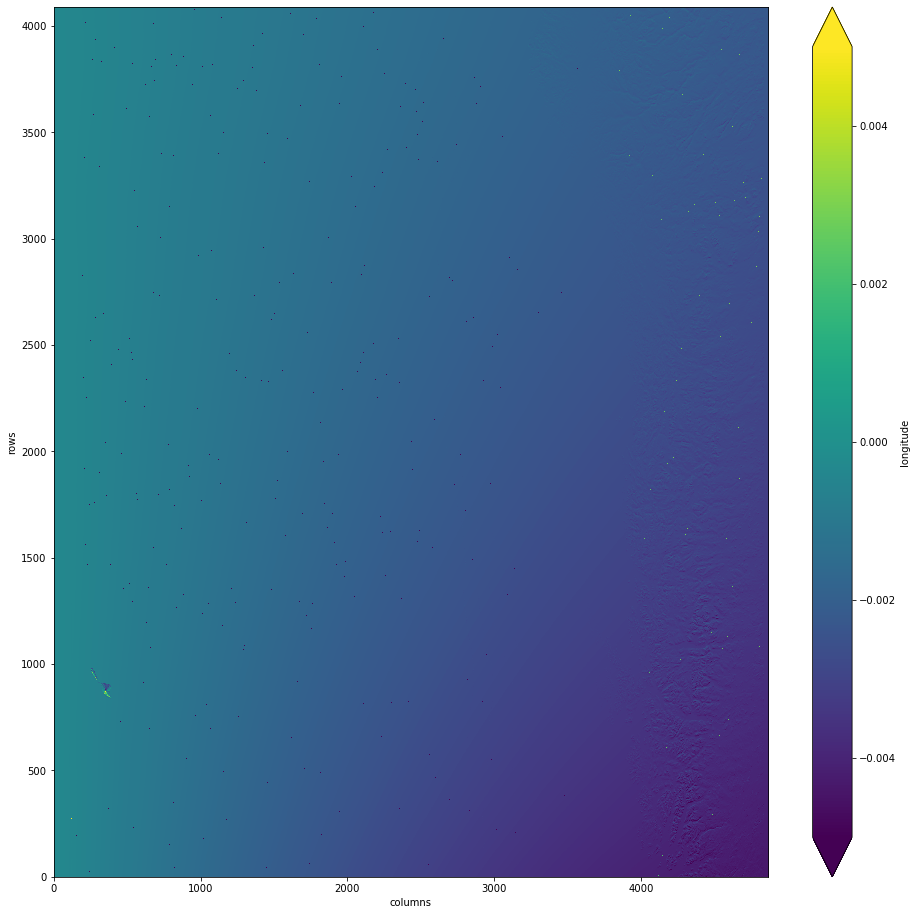

In [7]:
src_ds.longitude.diff('rows').plot.imshow(figsize=(16,16), vmin=-0.005, vmax=0.005)

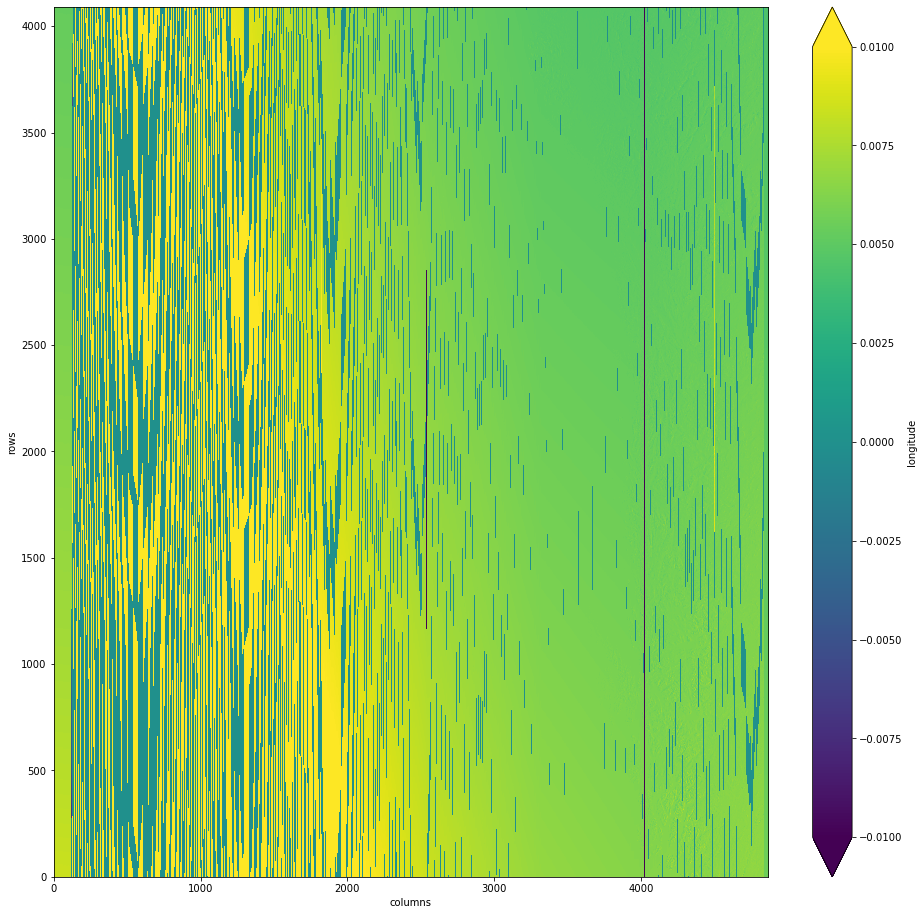

In [8]:
src_ds.longitude.diff('columns').plot.imshow(figsize=(16,16), vmin=-0.01, vmax=0.01)

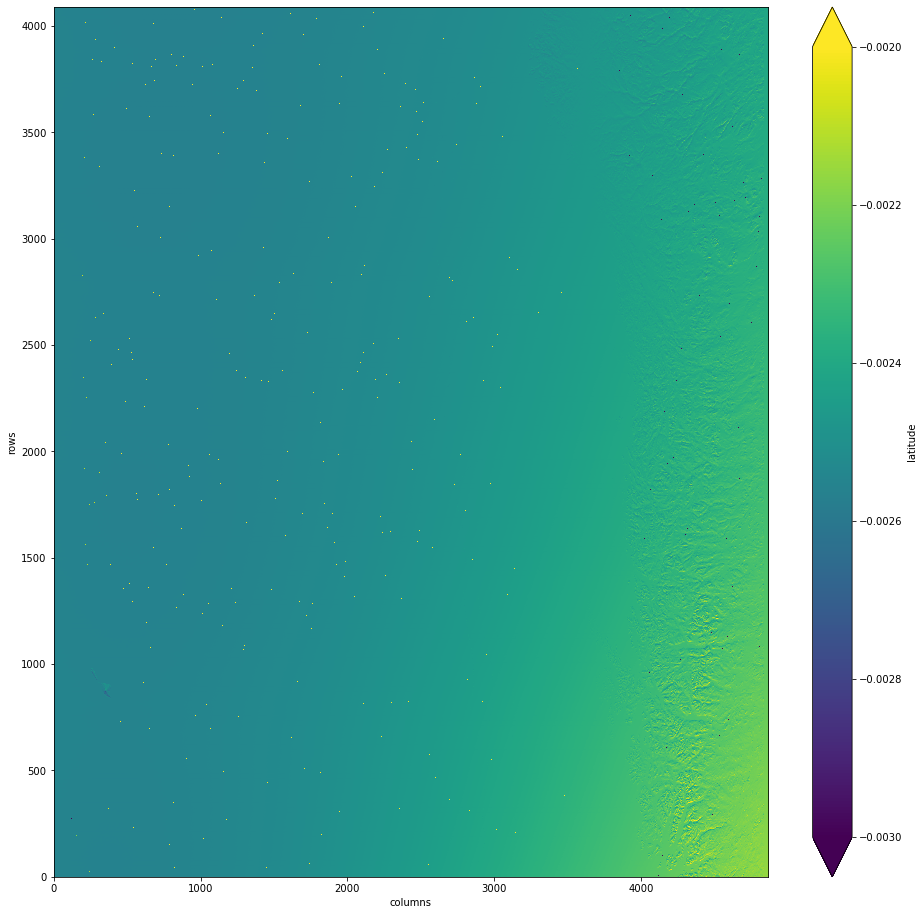

In [9]:
src_ds.latitude.diff('rows').plot.imshow(figsize=(16,16), vmin=-0.003, vmax=-0.002)

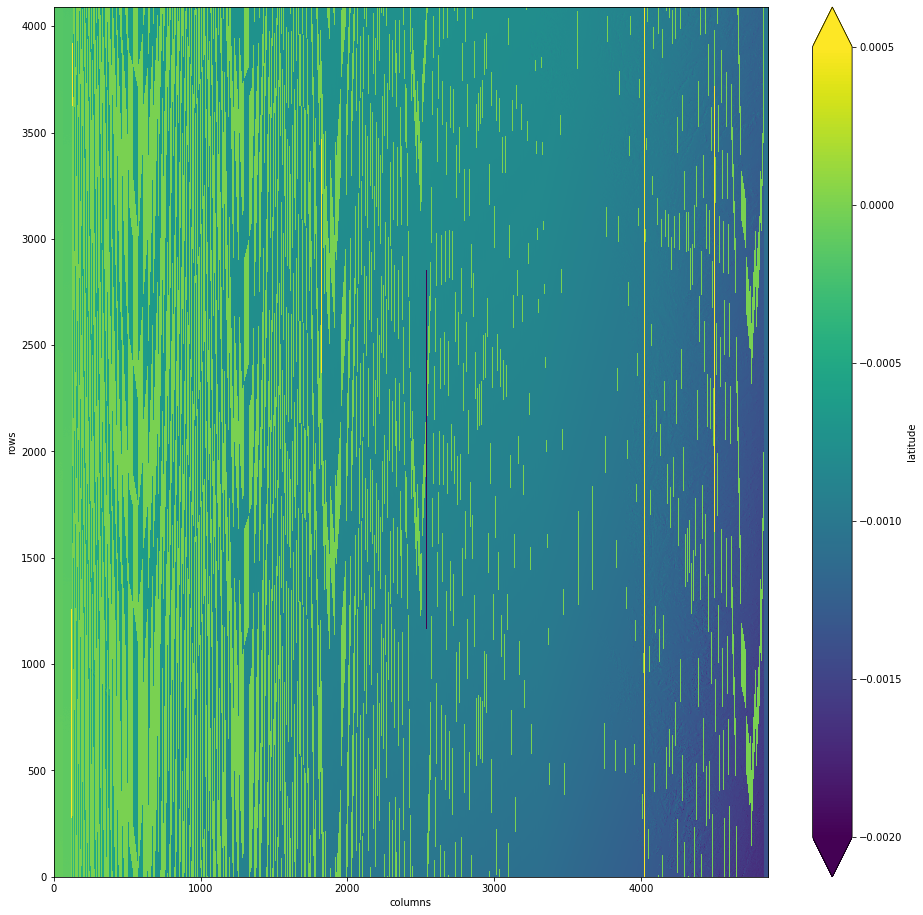

In [10]:
src_ds.latitude.diff('columns').plot.imshow(figsize=(16,16), vmin=-0.002, vmax=0.0005)

In [11]:
col_diff = np.sqrt(np.square(src_ds.longitude.diff('columns')) + np.square(src_ds.latitude.diff('columns'))) 
col_diff

<xarray.DataArray (rows: 4091, columns: 4864)>
array([[0.00843351, 0.00843451, 0.0084335 , ..., 0.00578544, 0.00578423,
        0.00578447],
       [0.00843251, 0.00843251, 0.0084325 , ..., 0.00578544, 0.00578423,
        0.00578447],
       [0.00843051, 0.00843151, 0.0084315 , ..., 0.00578326, 0.00578447,
        0.00578423],
       ...,
       [0.00530347, 0.00530444, 0.00530344, ..., 0.00451173, 0.00451098,
        0.00451173],
       [0.00530344, 0.00530244, 0.00530347, ..., 0.00451076, 0.00451098,
        0.00451173],
       [0.00530244, 0.00530244, 0.00530344, ..., 0.00451076, 0.00451098,
        0.00451076]])
Dimensions without coordinates: rows, columns

In [12]:
row_diff = np.sqrt(np.square(src_ds.longitude.diff('rows')) + np.square(src_ds.latitude.diff('rows'))) 
row_diff

<xarray.DataArray (rows: 4090, columns: 4865)>
array([[0.00256934, 0.00256946, 0.00256969, ..., 0.00487873, 0.00487873,
        0.00487873],
       [0.00256934, 0.00256957, 0.00256969, ..., 0.00487963, 0.00488007,
        0.00487963],
       [0.00256934, 0.00256946, 0.00256969, ..., 0.00487559, 0.00487604,
        0.00487648],
       ...,
       [0.00257784, 0.00257897, 0.00257897, ..., 0.00327525, 0.00327592,
        0.00327592],
       [0.00257883, 0.00257784, 0.00257812, ..., 0.00327592, 0.00327592,
        0.00327592],
       [0.00257883, 0.00257897, 0.00257897, ..., 0.00327525, 0.00327525,
        0.00327592]])
Dimensions without coordinates: rows, columns

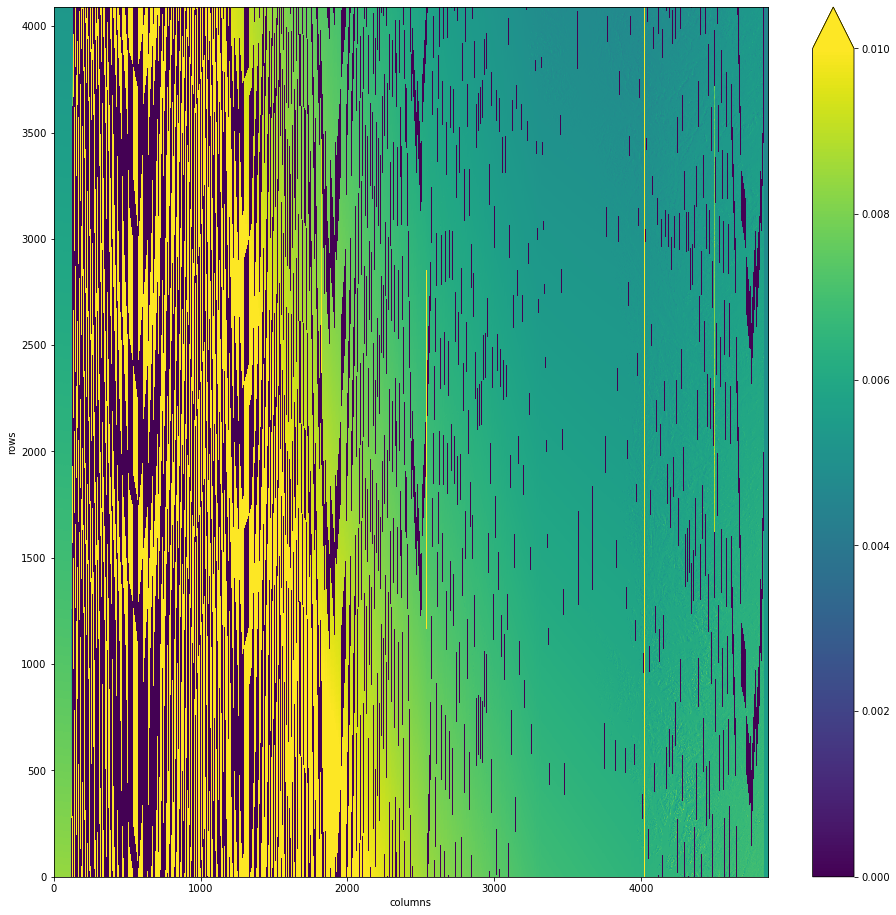

In [13]:
col_diff.plot.imshow(figsize=(16,16), vmin=0.0, vmax=0.01)

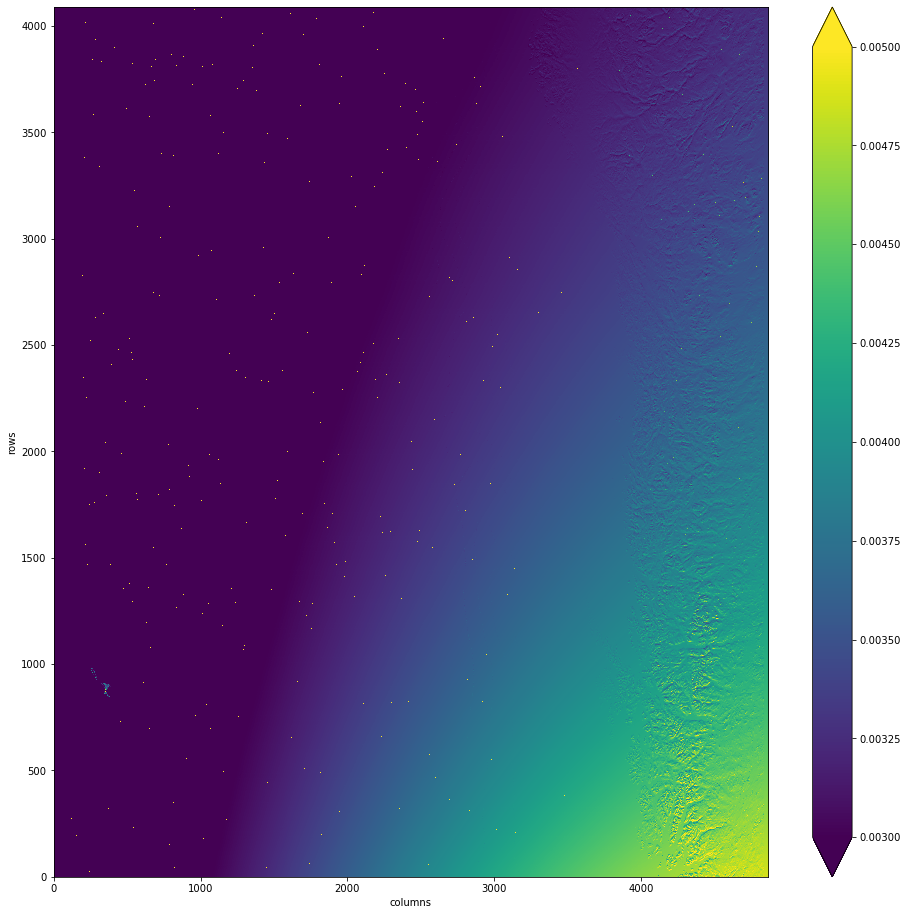

In [14]:
row_diff.plot.imshow(figsize=(16,16), vmin=0.003, vmax=0.005)

---
Rectify the dataset:

In [32]:
with measure_time(tag='reproject_dataset', logger=logger):
    dst_ds = rectify_dataset(src_ds, var_names='Oa13_radiance', output_ij_names=['source_i', 'source_j'])

reproject_dataset: took 13783.24ms


In [33]:
dst_ds

<xarray.Dataset>
Dimensions:         (bnds: 2, latitude: 7386, longitude: 20259)
Coordinates:
  * latitude        (latitude) float64 59.96 59.96 59.96 ... 73.35 73.35 73.35
  * longitude       (longitude) float64 -11.92 -11.92 -11.91 ... 24.82 24.82
    longitude_bnds  (longitude, bnds) float64 -11.92 -11.92 ... 24.82 24.82
    latitude_bnds   (latitude, bnds) float64 59.96 59.96 59.96 ... 73.35 73.35
Dimensions without coordinates: bnds
Data variables:
    Oa13_radiance   (latitude, longitude) float32 nan nan nan ... nan nan nan
    source_i        (latitude, longitude) float64 nan nan nan ... nan nan nan
    source_j        (latitude, longitude) float64 nan nan nan ... nan nan nan

In [17]:
Oa13_radiance = dst_ds.Oa13_radiance

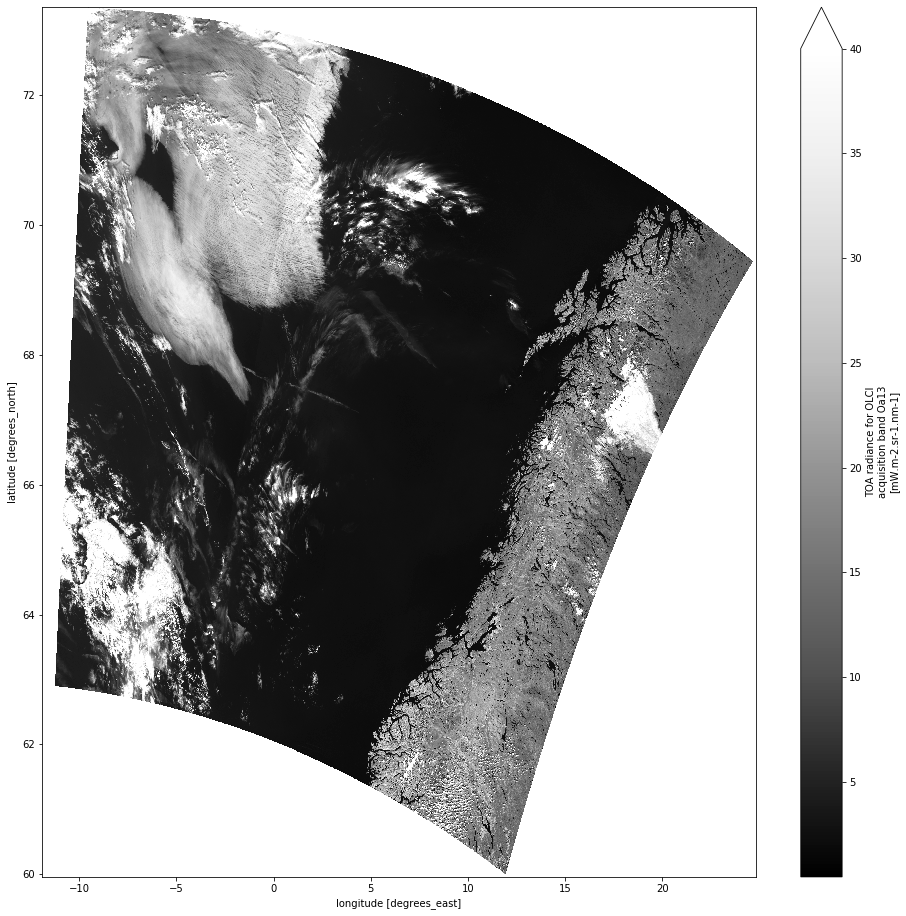

In [18]:
Oa13_radiance.plot.imshow(figsize=(16,16), vmax=40, cmap='Greys_r')

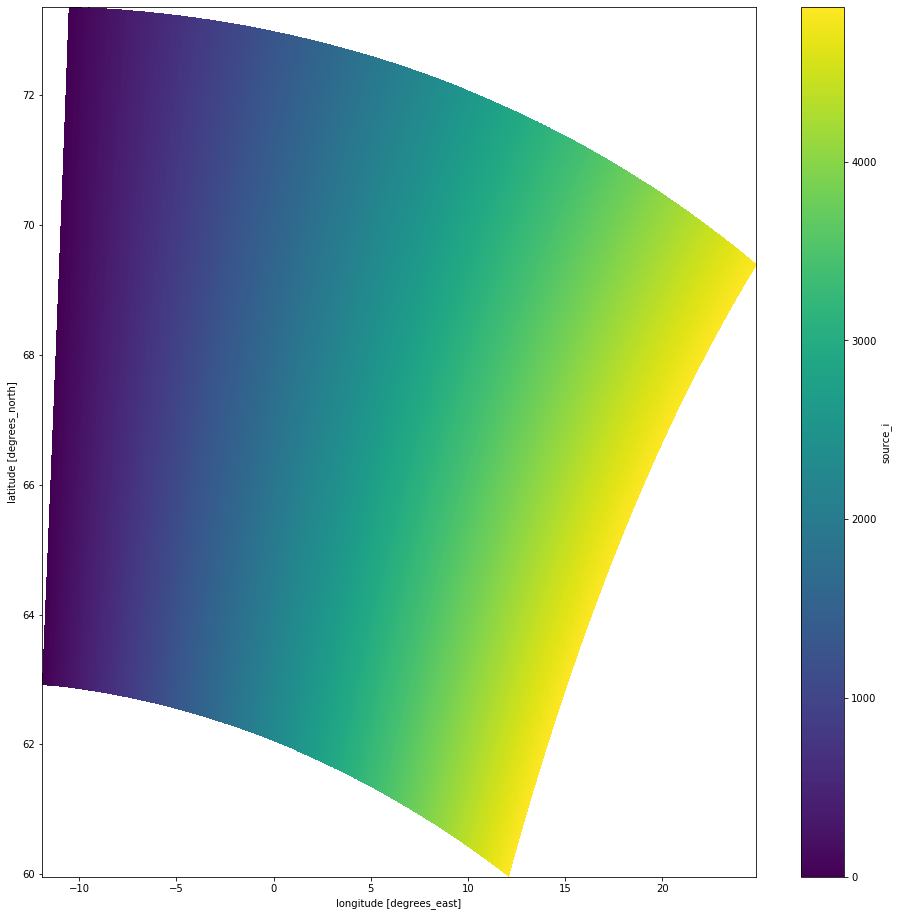

In [19]:
dst_ds.source_i.plot.imshow(figsize=(16,16))

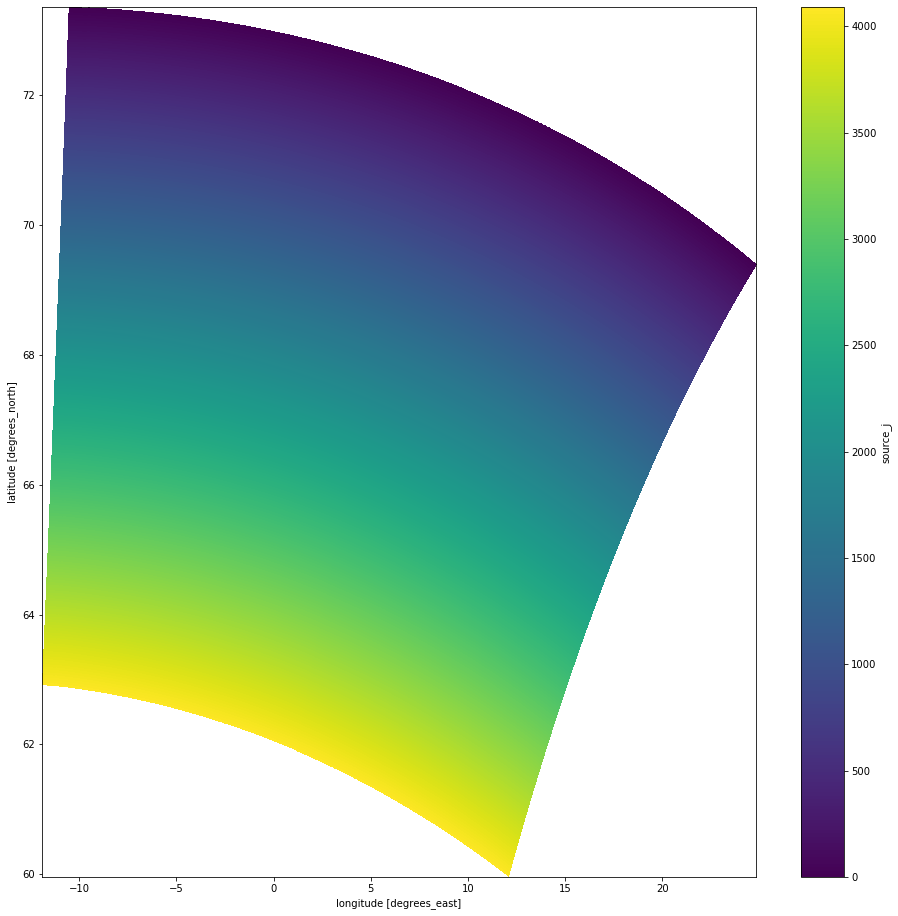

In [20]:
dst_ds.source_j.plot.imshow(figsize=(16,16))

## Creating subsets from source `longitude` and `latitude` using a bounding box `bbox`

Bounding box `bbox` in decimal degree:

In [21]:
bbox = (5, 62, 7, 64)

Compute `src_bbox` by selecting pixels in `bbox`:

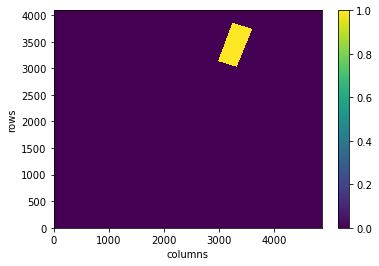

In [22]:
src_bbox = np.logical_and(np.logical_and(src_ds.longitude >= bbox[0], src_ds.longitude <= bbox[2]), 
                          np.logical_and(src_ds.latitude >= bbox[1], src_ds.latitude <= bbox[3]))
src_bbox.plot.imshow()

Select pixel coordinates from coordinate variables `x`, `y` using selected pixels in `src_bbox`:

In [23]:
x = src_ds.columns.where(src_bbox)
y = src_ds.rows.where(src_bbox)

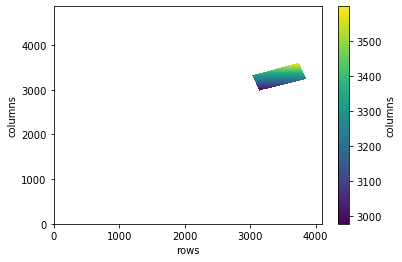

In [24]:
x.plot.imshow()

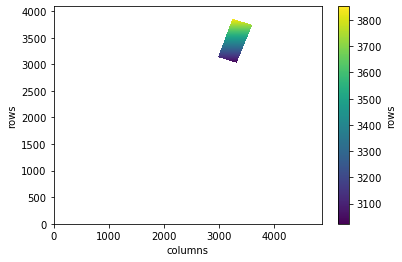

In [25]:
y.plot.imshow()

Get new bouning box `(x1, y1, x2, y2)` in pixel coordinates from min/max of `x` and `y`:

In [26]:
x1 = int(x.min())
x2 = int(x.max())
y1 = int(y.min())
y2 = int(y.max())

In [27]:
x1, y1, x2, y2

(2977, 3023, 3599, 3852)

Use bounding box `(x1, y1, x2, y2)` to select subset within source image:

In [28]:
rad = src_ds.Oa13_radiance.isel(columns=slice(x1, x2 + 1), rows=slice(y1, y2 + 1))
rad

<xarray.DataArray 'Oa13_radiance' (rows: 830, columns: 623)>
dask.array<getitem, shape=(830, 623), dtype=float32, chunksize=(784, 623), chunktype=numpy.ndarray>
Dimensions without coordinates: rows, columns
Attributes:
    ancillary_variables:  Oa13_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa13
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

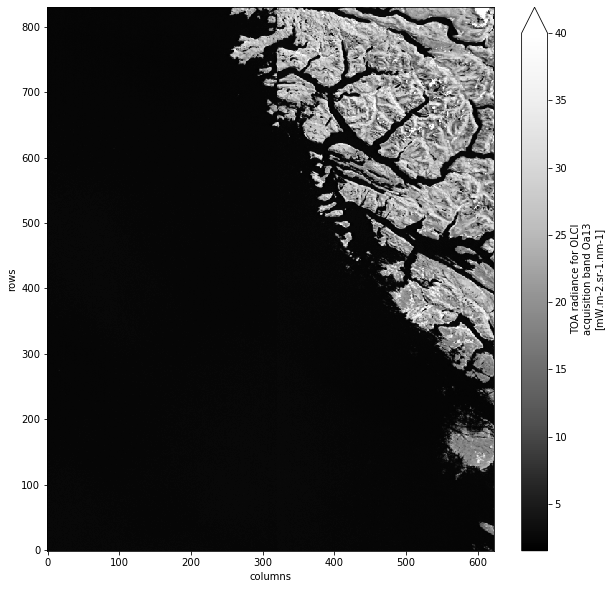

In [29]:
rad.plot.imshow(figsize=(10,10), vmax=40, cmap='Greys_r')

Verify: use bounding box `bbox` to select subset within target image:

In [30]:
rad = dst_ds.Oa13_radiance.sel(longitude=slice(bbox[0], bbox[2]), latitude=slice(bbox[1], bbox[3]))
rad

<xarray.DataArray 'Oa13_radiance' (latitude: 1103, longitude: 1102)>
array([[28.418604 , 28.418604 , 27.097906 , ..., 23.599627 , 23.599627 ,
        19.110823 ],
       [28.418604 , 25.085413 , 25.085413 , ..., 23.599627 , 23.599627 ,
        23.599627 ],
       [25.085413 , 25.085413 , 25.085413 , ..., 22.648409 , 21.477076 ,
        21.477076 ],
       ...,
       [ 2.531339 ,  2.586368 ,  2.586368 , ...,  2.5470617,  2.6020908,
         2.6020908],
       [ 2.5392003,  2.5392003,  2.5392003, ...,  2.5470617,  2.5470617,
         2.6020908],
       [ 2.5392003,  2.5392003,  2.5392003, ...,  2.5392003,  2.5392003,
         2.609952 ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 62.0 62.0 62.0 62.01 ... 63.99 64.0 64.0 64.0
  * longitude  (longitude) float64 5.002 5.003 5.005 5.007 ... 6.995 6.996 6.998
Attributes:
    ancillary_variables:  Oa13_radiance_err
    coordinates:          time_stamp altitude latitude longitude
    long_name:            TOA radiance for OLCI acquisition band Oa13
    standard_name:        toa_upwelling_spectral_radiance
    units:                mW.m-2.sr-1.nm-1
    valid_max:            65534
    valid_min:            0

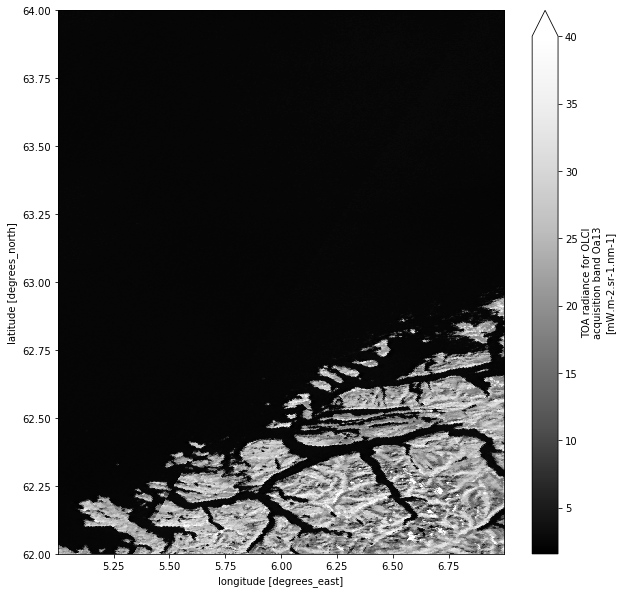

In [31]:
rad.plot.imshow(figsize=(10,10), vmax=40, cmap='Greys_r')